In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn import cluster, datasets, mixture
from sklearn import metrics
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

fileURL = "---"

data = pd.read_csv(fileURL)
data

age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                      ?  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                      ?      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32561 rows x 15 columns]

In [ ]:
obj=data.select_dtypes(include=['object']).copy()
obj.loc[:,:].replace('?',np.nan,inplace=True)
data.loc[:,:].replace('?',np.nan,inplace=True)
data

age workclass  fnlwgt     education  education.num      marital.status  \
0       90       NaN   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66       NaN  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                    NaN  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                    NaN      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32561 rows x 15 columns]

In [ ]:
data.apply(lambda x:sum(x.isnull()),axis=0)
data["workclass"].fillna("Private")
data["occupation"].fillna("Prof-speciality")
data["native.country"].fillna("United-States")
data['income'].replace(['>50K','<=50K'],[1,0],inplace=True)
data

age workclass  fnlwgt     education  education.num      marital.status  \
0       90       NaN   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66       NaN  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                    NaN  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                    NaN      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country  income  
0              4356              40  United-States       0  
1              4356              18  United-States       0  
2              4356              40  United-States       0  
3              3900              40  United-States       0  
4              3900              40  United-States       0  
...             ...             ...            ...     ...  
32556             0              40  United-States       0  
32557             0              38  United-States       0  
32558             0              40  United-States       1  
32559             0              40  United-States       0  
32560             0              20  United-States       0  

[32561 rows x 15 columns]

In [ ]:
data.drop(['fnlwgt'], axis = 1, inplace = True) #0 correlation
data.drop(['education.num'], axis = 1, inplace = True)  #one to one mapping of edu nd edu no.


In [ ]:
data.shape

(32561, 13)

In [ ]:
X=data.iloc[:,:].values

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X=LabelEncoder()
X[:,0]=labelencoder_X.fit_transform(X[:,0])
X[:,1]=labelencoder_X.fit_transform(X[:,1])
X[:,2]=labelencoder_X.fit_transform(X[:,2])
X[:,3]=labelencoder_X.fit_transform(X[:,3])
X[:,4]=labelencoder_X.fit_transform(X[:,4])
X[:,5]=labelencoder_X.fit_transform(X[:,5])
X[:,6]=labelencoder_X.fit_transform(X[:,6])
X[:,7]=labelencoder_X.fit_transform(X[:,7])
X[:,8]=labelencoder_X.fit_transform(X[:,8])
X[:,10]=labelencoder_X.fit_transform(X[:,10])
X[:,11]=labelencoder_X.fit_transform(X[:,11])

z=pd.DataFrame(X)
z

0  1   2  3   4  5  6  7  8     9   10  11 12
0      72  8  11  6  14  1  4  0  0  4356  39  38  0
1      65  3  11  6   3  1  4  0  0  4356  17  38  0
2      49  8  15  6  14  4  2  0  0  4356  39  38  0
3      37  3   5  0   6  4  4  0  0  3900  39  38  0
4      24  3  15  5   9  3  4  0  0  3900  39  38  0
...    .. ..  .. ..  .. .. .. .. ..   ...  ..  .. ..
32556   5  3  15  4  10  1  4  1  0     0  39  38  0
32557  10  3   7  2  12  5  4  0  0     0  37  38  0
32558  23  3  11  2   6  0  4  1  0     0  39  38  1
32559  41  3  11  6   0  4  4  0  0     0  39  38  0
32560   5  3  11  4   0  3  4  1  0     0  19  38  0

[32561 rows x 13 columns]

In [ ]:
X=z.loc[:,:11]
y=data.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# X, y = make_classification(n_samples=10, n_features=4,
#                            n_informative=2, n_redundant=0, 
#                            random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=200)
#clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


prec_rec = classification_report(y_pred, y_test)
print("CLASSIFICATION REPORT")
print(prec_rec)

Accuracy: 0.8517760262053434
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7778
           1       0.61      0.74      0.67      1991

    accuracy                           0.85      9769
   macro avg       0.77      0.81      0.79      9769
weighted avg       0.87      0.85      0.86      9769



In [ ]:
ind_tree = (clf.estimators_[4])
print(ind_tree)

DecisionTreeClassifier(max_features='auto', random_state=1789160804)


In [ ]:
class PrunedRandomForest:


    def __init__(self, n_clusters = 5 , n_estimators = 300, cv = 5):
        """ this is the unpruned random forest """
        self.rf = RandomForestClassifier(n_estimators = n_estimators)

        """ this is the final pruned random forest """
        self.prf = None 
        self.prf1 = None 

        
        """this is a list of decision tree object present in original unpruned random forest"""
        self.decision_trees = None 
        
        """number of clusters for pruning"""
        self.n_clusters = n_clusters 
        
        

        """ 
            this contains dictionary of lists where each element of dictionary represetns a
            pair (cluster_idx, tree_idx_list)

            where tree_idx_list is list of decision tree indices and cluster_idx is index of cluster 
            e.g.
            
            {
                0 : [2, 0]
                1 : [1, 3]
            }
            it means decision tree at 2nd index and 0th index 
            are in same cluster similarly 1st and 3rd in second cluster

        """ 
        self.clusters = {}
        
        self.cv = cv


        """
            Information about all trees in the random forest present in this 
            form
            {
                idx : { 
                    accuracy : 89.34
                    cluster : 2
                }

                idx1 : {

                }
            }
        """
        self.info = {}
        #self.maxs_accuracy = {}
        self.fimps = None

    def prune(self):
        pass

    
    def fit(self, X, y):
        self.rf.fit(X,y)
        self.decision_trees = self.rf.estimators_
        self.create_feature_imp_clusters()
        self.create_feature_imp_clusters1()
        self.create_fimp_agglomerative()
        self.create_fimp_gaussian()
        self.create_fimp_spectral_clustering()
        #self.plot_clusters(X,y)
        #self.all_algorithms()

        self.fill_info(X, y)
        #self.max_accuracy(X,y)
        self.prune()

    def fill_info(self, X, y):
        for idx, tree in enumerate(self.decision_trees):
            self.info[idx] = self.fill_for_tree(tree, X, y)

        for cluster_idx in self.clusters:
            for tree_idx in self.clusters[cluster_idx]:
                self.info[tree_idx]["cluster_idx"] = cluster_idx 
       

    """
        {
            "accuracy" : 98.45,
            
        } 
    """


    def fill_for_tree(self, tree, X, y):
        info = {}
        mean_score = cross_val_score(tree, X, y, cv=self.cv).mean()
        info["accuracy"] = (mean_score)
        return info

    def predict(self, X):
        if(self.prf is None):
            return None
        
        return self.prf.predict(X)

    
    def get_decision_trees(self):
        return self.decision_trees

    def get_feature_imps_from_rf(self):
        feature_imp_list = []
        dts = self.get_decision_trees()
        for tree in dts:
            feature_imp_list.append(tree.feature_importances_)
        return feature_imp_list

    def create_feature_imp_clusters(self):
        fimps = self.get_feature_imps_from_rf()
        #print(fimps)
        #print("KMEANS")
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=0).fit(fimps)

        print(" fimps len = " + str(len(fimps)))
        labels = kmeans.labels_
        score = silhouette_score(fimps, labels, metric='euclidean')
        print('Silhouetter Score: %.3f' % score)
        #print(labels)
        print(" kmeans.labels_ len = " + str(len(kmeans.labels_)))
        for (tree_idx, cluster_idx) in enumerate(kmeans.labels_):
            if cluster_idx in self.clusters:
                self.clusters[cluster_idx].append(tree_idx)
            else:
                self.clusters[cluster_idx] = [tree_idx]
        
    def create_feature_imp_clusters1(self):
        fimps = self.get_feature_imps_from_rf()
        #print("DBSCAN-")
        dbscan = DBSCAN().fit(fimps)

        print(" fimps len = " + str(len(fimps)))
        labels = dbscan.labels_
        #print(labels)
        print(" dbscan.labels_ len = " + str(len(labels)))
        

    def create_fimp_agglomerative(self):
        fimps = self.get_feature_imps_from_rf()
        #print("AGGLOMERATIVE CLUSTERING-")
        groups = AgglomerativeClustering(n_clusters=self.n_clusters).fit(fimps)
        #print(groups.labels_)

    def create_fimp_gaussian(self):
      fimps = self.get_feature_imps_from_rf()
      #print("GAUSSIAN CLUSTERING-")
      gmm =GaussianMixture(n_components = 5)
      gmm.fit(fimps)
      labelsgmm = gmm.predict(fimps)
      #print(labelsgmm)
      
    def create_fimp_spectral_clustering(self):
      fimps = self.get_feature_imps_from_rf()
      models = SpectralClustering(n_clusters=6, random_state=25, n_neighbors=8, affinity='nearest_neighbors')
      models.fit(fimps)
      labelsx = models.fit_predict(fimps)
      #print(labelsx)


In [ ]:
prf = PrunedRandomForest(20, 300)
prf.fit(X, y)
print('KMEANS-')
for cluster_idx in prf.clusters:
          print(str(cluster_idx) + " ==> ", prf.clusters[cluster_idx])

prf1 = PrunedRandomForest()
prf1.fit(X, y)
print('DBSCAN-')
for cluster_idx in prf1.clusters:
          print(str(cluster_idx) + " ==> ", prf1.clusters[cluster_idx])

prf2 = PrunedRandomForest()
prf2.fit(X, y)
print('AGGLO')
for cluster_idx in prf2.clusters:
          print(str(cluster_idx) + " ==> ", prf2.clusters[cluster_idx])

prf3 = PrunedRandomForest()
prf3.fit(X,y)
print('Gaussian')
for cluster_idx in prf3.clusters:
          print(str(cluster_idx) + " ==> ", prf3.clusters[cluster_idx])

prf4 = PrunedRandomForest()
prf4.fit(X,y)
print('spectral clustering')
for cluster_idx in prf4.clusters:
          print(str(cluster_idx) + " ==> ", prf4.clusters[cluster_idx])


 fimps len = 300
Silhouetter Score: 0.249
 kmeans.labels_ len = 300
 fimps len = 300
 dbscan.labels_ len = 300
KMEANS-
12 ==>  [0, 40, 115, 135, 173, 180, 234, 261, 265, 282, 292]
7 ==>  [1, 17, 30, 56, 80, 81, 90, 110, 117, 123, 144, 145, 152, 172, 179, 184, 185, 191, 223, 237, 239, 245, 293]
14 ==>  [2, 8, 35, 54, 75, 155, 176, 232, 274, 288]
6 ==>  [3, 6, 31, 36, 44, 82, 93, 97, 129, 161, 166, 193, 213, 221, 236, 238, 241, 277, 280, 295]
9 ==>  [4, 9, 48, 59, 91, 94, 127, 138, 146, 149, 222, 243, 251, 259, 271]
16 ==>  [5, 95, 141, 190, 235, 283, 285, 290]
0 ==>  [7, 13, 14, 67, 72, 79, 83, 86, 96, 150, 163, 192, 199, 203, 205, 217, 218, 219, 224, 230, 249, 260, 263, 264, 286, 291]
10 ==>  [10, 12, 19, 43, 57, 62, 68, 101, 102, 118, 121, 153, 154, 160, 162, 167, 170, 171, 177, 178, 189, 194, 210, 216, 220, 225, 229, 253, 266, 272, 273, 284, 287]
2 ==>  [11, 33, 52, 58, 69, 100, 107, 130, 132, 142, 169, 196, 248, 267]
11 ==>  [15, 20, 41, 42, 46, 61, 64, 77, 84, 88, 108, 120, 128, 13

In [ ]:
  # def plot_clusters(model, X):
  #     pred = model.fit(X)
  #     clusters = unique(pred)
  #     for cluster in clusters:
  #       row_idx = where(pred == cluster)
  #       # create scatter of these samples
  #       col0 = getColumn(X, row_idx, 0)
  #       col1 = getColumn(X, row_idx, 1)
  #       pyplot.scatter(col0, col1)
  #   # show the plot
  #   pyplot.show()

  #   def all_algorithms(self):
  #       fimps = self.get_feature_imps_from_rf()
  #       print("KMEANS")
  #       kmeans = self.plot_clusters(KMeans(n_clusters=self.n_clusters, random_state=0), fimps)
  #       print("DBSCAN-")
  #       dbscan = self.plot_clusters(DBSCAN(), fimps)
  #       print("AGGLOMERATIVE CLUSTERING-")
  #       groups = self.plot_clusters(AgglomerativeClustering(n_clusters=self.n_clusters), fimps)
  #       print(" fimps len = " + str(len(fimps)))
  #       #print(labels)
  #       print(" kmeans.labels_ len = " + str(len(kmeans.labels_)))

In [ ]:
# plt.title("Dendograms")
# dend = shc.dendrogram(shc.linkage(X, method='ward'))
# groups = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage="ward")
# groups.fit(X)

In [ ]:
prf.info

{0: {'accuracy': 0.7817334712544293, 'cluster_idx': 12},
 1: {'accuracy': 0.7751303384536918, 'cluster_idx': 7},
 2: {'accuracy': 0.7743628128358666, 'cluster_idx': 14},
 3: {'accuracy': 0.7732880204437089, 'cluster_idx': 6},
 4: {'accuracy': 0.7776799547757631, 'cluster_idx': 9},
 5: {'accuracy': 0.7687421745056475, 'cluster_idx': 16},
 6: {'accuracy': 0.7782012944438094, 'cluster_idx': 6},
 7: {'accuracy': 0.7767886500670931, 'cluster_idx': 0},
 8: {'accuracy': 0.7649342686767836, 'cluster_idx': 14},
 9: {'accuracy': 0.7742401183269447, 'cluster_idx': 9},
 10: {'accuracy': 0.7779557875366259, 'cluster_idx': 10},
 11: {'accuracy': 0.7683427324145887, 'cluster_idx': 2},
 12: {'accuracy': 0.7771263134287087, 'cluster_idx': 10},
 13: {'accuracy': 0.777280347639629, 'cluster_idx': 0},
 14: {'accuracy': 0.7739636159546339, 'cluster_idx': 0},
 15: {'accuracy': 0.7698479717940796, 'cluster_idx': 11},
 16: {'accuracy': 0.7697249189015656, 'cluster_idx': 3},
 17: {'accuracy': 0.764657629552839

In [ ]:
max_acc = -1
max_acc_in_cluster = -1
idx = ""
lists = []
list1 = []
res = set()
dicts = prf.info
for k, subdict in dicts.items():
      res.add(subdict['cluster_idx'])
      if subdict['accuracy'] >= max_acc:
        max_acc = subdict['accuracy']
        idx = subdict['cluster_idx']
        lists.append([max_acc,idx, k])
        for i in range(len(res)):
          if i == idx:
            list1.append([i,max_acc,k])

print(max_acc, idx)
result = set([c for a, c, t in lists])
result
print("List of clusters with maximum accuracy is:\n")
print("Cluster index,Maximum accuracy,decision tree\n",sorted(list1))

#for each cluster get max acc nd tree to be selected as representsative
#once all the cluster representatives are found ..remove all others ..prune function
# calculated overall performance of random forest again-challenging

0.7827470413548258 13
List of clusters with maximum accuracy is:

Cluster index,Maximum accuracy,decision tree
 [[11, 0.7819484872628586, 46], [13, 0.7821328897676203, 50], [13, 0.7827470413548258, 204], [15, 0.7822556172855574, 200]]


In [ ]:
# Highest acuracy selection-Cluster Representative
def getMaxAccuracyCluster(dicts):
    clusterObj = {}
    for key, value in dicts.items():
      if(clusterObj.get(str(value["cluster_idx"])) != None):
        clusterObj[str(value["cluster_idx"])].append({"index" : key, "accuracy" : value['accuracy']})
      else:
        clusterObj[str(value["cluster_idx"])] = []
        clusterObj[str(value["cluster_idx"])].append({"index" : key, "accuracy" : value['accuracy']})
    #Restructured the object so the key for dictionary is cluster_idx
    #Now you can access all the accuracies of cluster as below
    #print(clusterObj["2"])
    clusterMaxAccuracyObj = {}
    for clusterIndex in clusterObj.keys():
      max_acc = -1;
      for obj in clusterObj[clusterIndex]:
        if obj['accuracy'] == max_acc:
          clusterMaxAccuracyObj[str(clusterIndex)].append(obj['index'])
        if obj['accuracy'] > max_acc:
          max_acc = obj['accuracy']
          clusterMaxAccuracyObj[str(clusterIndex)] = []
          clusterMaxAccuracyObj[str(clusterIndex)].append(obj['index'])
    print(clusterMaxAccuracyObj)
    dict1 = {}
    print("Selecting first maximum accuracy of a decision tree in each cluster:")
    for key,val in clusterMaxAccuracyObj.items():
      output = {key : val[0]}
      print(output)
    return clusterMaxAccuracyObj

In [ ]:
getMaxAccuracyCluster(prf.info)

{'12': [0], '7': [184], '14': [75], '6': [82], '9': [4], '16': [285], '0': [205], '10': [43], '2': [52], '11': [46], '3': [55], '17': [233], '4': [156], '5': [136], '13': [204], '8': [116], '15': [200], '19': [175], '18': [188], '1': [256]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'12': 0}
{'7': 184}
{'14': 75}
{'6': 82}
{'9': 4}
{'16': 285}
{'0': 205}
{'10': 43}
{'2': 52}
{'11': 46}
{'3': 55}
{'17': 233}
{'4': 156}
{'5': 136}
{'13': 204}
{'8': 116}
{'15': 200}
{'19': 175}
{'18': 188}
{'1': 256}


{'0': [205],
 '1': [256],
 '10': [43],
 '11': [46],
 '12': [0],
 '13': [204],
 '14': [75],
 '15': [200],
 '16': [285],
 '17': [233],
 '18': [188],
 '19': [175],
 '2': [52],
 '3': [55],
 '4': [156],
 '5': [136],
 '6': [82],
 '7': [184],
 '8': [116],
 '9': [4]}

In [ ]:
prf.decision_trees[0].predict(X)

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
def getTreeList(X, dicts):
    treeIdxs = []
    for trees in dicts.values():
        treeIdxs.append(trees[0])
    return treeIdxs

stored_ypred = []
def predict(X, treeList, prf):
    ypred = []
    for treeIdx in treeList:
        print(prf.decision_trees[treeIdx].predict(X))
        ypred.append(prf.decision_trees[treeIdx].predict(X))
    stored_ypred.append(ypred)
    print(type(ypred))
    return getMajorityLabels(ypred)

def getMajorityLabels(pred):
    predNp = np.array(pred)
    rows,cols = predNp.shape
    res = []
    for colIdx in range(cols):
        col = list(predNp[:, colIdx])
        res.append(max(set(col), key = col.count))
    return res




In [ ]:
treeList = getTreeList(X, getMaxAccuracyCluster(prf.info))

y_preed = predict(X_test, treeList, prf)

print("final answer = ", y_preed)
  
print("testing target data:",y_test)
  
print("Accuracy:",metrics.accuracy_score(y_test, y_preed))

{'12': [0], '7': [184], '14': [75], '6': [82], '9': [4], '16': [285], '0': [205], '10': [43], '2': [52], '11': [46], '3': [55], '17': [233], '4': [156], '5': [136], '13': [204], '8': [116], '15': [200], '19': [175], '18': [188], '1': [256]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'12': 0}
{'7': 184}
{'14': 75}
{'6': 82}
{'9': 4}
{'16': 285}
{'0': 205}
{'10': 43}
{'2': 52}
{'11': 46}
{'3': 55}
{'17': 233}
{'4': 156}
{'5': 136}
{'13': 204}
{'8': 116}
{'15': 200}
{'19': 175}
{'18': 188}
{'1': 256}
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 1. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 1. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 

Most repeated accuracy selection-Mode
Average accuracy selection-mean
Choosing the middle value after sorting the accuracy-median
Apart from accuracy-what else can be chosen for performance evaluation in decision tree???
Next step? Pruning? How to evaluate performance after pruning?


In [ ]:
prf1.info

{0: {'accuracy': 0.7732261521183676, 'cluster_idx': 2},
 1: {'accuracy': 0.7724889806476632, 'cluster_idx': 2},
 2: {'accuracy': 0.7766661441811143, 'cluster_idx': 2},
 3: {'accuracy': 0.7657327897597359, 'cluster_idx': 2},
 4: {'accuracy': 0.7667155294400804, 'cluster_idx': 4},
 5: {'accuracy': 0.7724586547939841, 'cluster_idx': 2},
 6: {'accuracy': 0.767974229201774, 'cluster_idx': 3},
 7: {'accuracy': 0.768281873221993, 'cluster_idx': 2},
 8: {'accuracy': 0.7697868013736278, 'cluster_idx': 2},
 9: {'accuracy': 0.773748585799484, 'cluster_idx': 4},
 10: {'accuracy': 0.7647499416211991, 'cluster_idx': 4},
 11: {'accuracy': 0.7775872796082377, 'cluster_idx': 2},
 12: {'accuracy': 0.7622008157187798, 'cluster_idx': 3},
 13: {'accuracy': 0.772765572615872, 'cluster_idx': 3},
 14: {'accuracy': 0.7664697254517614, 'cluster_idx': 3},
 15: {'accuracy': 0.7717215351945891, 'cluster_idx': 4},
 16: {'accuracy': 0.772919055104684, 'cluster_idx': 3},
 17: {'accuracy': 0.7764817841165147, 'cluster

In [ ]:
#dbscan
getMaxAccuracyCluster(prf1.info)

{'2': [195], '4': [235], '3': [121], '0': [76], '1': [55]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'2': 195}
{'4': 235}
{'3': 121}
{'0': 76}
{'1': 55}


{'0': [76], '1': [55], '2': [195], '3': [121], '4': [235]}

In [ ]:
treeList = getTreeList(X, getMaxAccuracyCluster(prf1.info))

y_preed = predict(X_test, treeList, prf1)

print("final answer = ", y_preed)
print(y_test)
  
print("Accuracy:",metrics.accuracy_score(y_test, y_preed))

{'2': [195], '4': [235], '3': [121], '0': [76], '1': [55]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'2': 195}
{'4': 235}
{'3': 121}
{'0': 76}
{'1': 55}
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[1. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 1. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
<class 'list'>
final answer =  [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.

sample->output(class label)

list of samples(vectors)->list of classes-predicted ones

actual values->target 

compare(target,predicted)->accuracy

compare the accuracy of 100 trees using random forest and the accuracy of 6 trees formed in the end

aprt from accuracy, most seperated distance between two decision trees in each cluster

In [ ]:
prf2.info

{0: {'accuracy': 0.7751918248175733, 'cluster_idx': 1},
 1: {'accuracy': 0.7765740113045502, 'cluster_idx': 0},
 2: {'accuracy': 0.7745470267176854, 'cluster_idx': 0},
 3: {'accuracy': 0.7758979489518412, 'cluster_idx': 1},
 4: {'accuracy': 0.7730419382365491, 'cluster_idx': 4},
 5: {'accuracy': 0.7705853601811686, 'cluster_idx': 0},
 6: {'accuracy': 0.7671455661725123, 'cluster_idx': 3},
 7: {'accuracy': 0.775652470338099, 'cluster_idx': 2},
 8: {'accuracy': 0.7675445461373605, 'cluster_idx': 1},
 9: {'accuracy': 0.7800442679185193, 'cluster_idx': 3},
 10: {'accuracy': 0.7727958796072569, 'cluster_idx': 3},
 11: {'accuracy': 0.7712301252720414, 'cluster_idx': 4},
 12: {'accuracy': 0.7790615423848957, 'cluster_idx': 0},
 13: {'accuracy': 0.7653949141973093, 'cluster_idx': 2},
 14: {'accuracy': 0.7653028473387755, 'cluster_idx': 3},
 15: {'accuracy': 0.7651182986512328, 'cluster_idx': 3},
 16: {'accuracy': 0.7662856718994444, 'cluster_idx': 4},
 17: {'accuracy': 0.7737794115039625, 'clu

In [ ]:
#agglo
getMaxAccuracyCluster(prf2.info)

{'1': [116], '0': [273], '4': [183], '3': [124], '2': [111]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'1': 116}
{'0': 273}
{'4': 183}
{'3': 124}
{'2': 111}


{'0': [273], '1': [116], '2': [111], '3': [124], '4': [183]}

In [ ]:
treeList = getTreeList(X, getMaxAccuracyCluster(prf2.info))

y_preed = predict(X_test, treeList, prf2)

print("final answer = ", y_preed)
print(y_test)
  
print("Accuracy:",metrics.accuracy_score(y_test, y_preed))

{'1': [116], '0': [273], '4': [183], '3': [124], '2': [111]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'1': 116}
{'0': 273}
{'4': 183}
{'3': 124}
{'2': 111}
[0. 0. 1. ... 0. 0. 0.]
[1. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[1. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
<class 'list'>
final answer =  [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0

In [ ]:
prf3.info

{0: {'accuracy': 0.7724894050492853, 'cluster_idx': 3},
 1: {'accuracy': 0.7780480335869557, 'cluster_idx': 1},
 2: {'accuracy': 0.7769118868669767, 'cluster_idx': 1},
 3: {'accuracy': 0.7708311217293253, 'cluster_idx': 0},
 4: {'accuracy': 0.7712919322949263, 'cluster_idx': 0},
 5: {'accuracy': 0.7750381537058184, 'cluster_idx': 1},
 6: {'accuracy': 0.7653332957973676, 'cluster_idx': 3},
 7: {'accuracy': 0.7810577154140029, 'cluster_idx': 4},
 8: {'accuracy': 0.7763280375555826, 'cluster_idx': 0},
 9: {'accuracy': 0.7755603657549766, 'cluster_idx': 1},
 10: {'accuracy': 0.7789694472329203, 'cluster_idx': 0},
 11: {'accuracy': 0.7749153365919834, 'cluster_idx': 4},
 12: {'accuracy': 0.7664698056165122, 'cluster_idx': 1},
 13: {'accuracy': 0.7792151380474734, 'cluster_idx': 1},
 14: {'accuracy': 0.764596374252063, 'cluster_idx': 1},
 15: {'accuracy': 0.7722741579777508, 'cluster_idx': 1},
 16: {'accuracy': 0.774423978540745, 'cluster_idx': 4},
 17: {'accuracy': 0.7742397693745, 'cluster

In [ ]:
#gaussian
getMaxAccuracyCluster(prf3.info)

{'3': [33], '1': [98], '0': [121], '4': [7], '2': [222]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'3': 33}
{'1': 98}
{'0': 121}
{'4': 7}
{'2': 222}


{'0': [121], '1': [98], '2': [222], '3': [33], '4': [7]}

In [ ]:
treeList = getTreeList(X, getMaxAccuracyCluster(prf3.info))

y_preed = predict(X_test, treeList, prf3)

print("final answer = ", y_preed)
print(y_test)
  
print("Accuracy:",metrics.accuracy_score(y_test, y_preed))

{'3': [33], '1': [98], '0': [121], '4': [7], '2': [222]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'3': 33}
{'1': 98}
{'0': 121}
{'4': 7}
{'2': 222}
[0. 0. 1. ... 0. 0. 0.]
[1. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[1. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
<class 'list'>
final answer =  [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1

In [ ]:
prf4.info

{0: {'accuracy': 0.7642893243941148, 'cluster_idx': 1},
 1: {'accuracy': 0.7743628505604553, 'cluster_idx': 3},
 2: {'accuracy': 0.7684964176730643, 'cluster_idx': 0},
 3: {'accuracy': 0.7750994986024926, 'cluster_idx': 0},
 4: {'accuracy': 0.7656713269737221, 'cluster_idx': 1},
 5: {'accuracy': 0.7690185589886188, 'cluster_idx': 3},
 6: {'accuracy': 0.7776794172003754, 'cluster_idx': 0},
 7: {'accuracy': 0.7734103990092015, 'cluster_idx': 0},
 8: {'accuracy': 0.7677904868773132, 'cluster_idx': 3},
 9: {'accuracy': 0.7732567844843293, 'cluster_idx': 2},
 10: {'accuracy': 0.7700625964099019, 'cluster_idx': 4},
 11: {'accuracy': 0.7638593159551244, 'cluster_idx': 1},
 12: {'accuracy': 0.7749772096328982, 'cluster_idx': 1},
 13: {'accuracy': 0.779798893047396, 'cluster_idx': 3},
 14: {'accuracy': 0.7778942587325821, 'cluster_idx': 3},
 15: {'accuracy': 0.7756831687220909, 'cluster_idx': 3},
 16: {'accuracy': 0.7755298512783543, 'cluster_idx': 0},
 17: {'accuracy': 0.7685271773595126, 'clu

In [ ]:
#spectral
getMaxAccuracyCluster(prf4.info)

{'1': [19], '3': [139], '0': [197], '2': [291], '4': [143]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'1': 19}
{'3': 139}
{'0': 197}
{'2': 291}
{'4': 143}


{'0': [197], '1': [19], '2': [291], '3': [139], '4': [143]}

In [ ]:
treeList = getTreeList(X, getMaxAccuracyCluster(prf4.info))

y_preed = predict(X_test, treeList, prf4)

print("final answer = ", y_preed)
print(y_test)
  
print("Accuracy:",metrics.accuracy_score(y_test, y_preed))

{'1': [19], '3': [139], '0': [197], '2': [291], '4': [143]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'1': 19}
{'3': 139}
{'0': 197}
{'2': 291}
{'4': 143}
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[1. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[1. 0. 1. ... 0. 0. 0.]
<class 'list'>
final answer =  [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 

In [ ]:
rf = DecisionTreeClassifier()

rf.fit(X,y)

cross_val_score(rf, X, y, cv = 5).mean()

0.7723051770207459

In [ ]:
def plot_accuracy(ax, prf, cluster_idx):
    y = []

    for key in prf.info:
        if prf.info[key]["cluster_idx"] == cluster_idx:
            y.append(prf.info[key]["accuracy"])
    ax.set_title("cluster " + str(cluster_idx))
    ax.bar(range(len(y)), y)
    

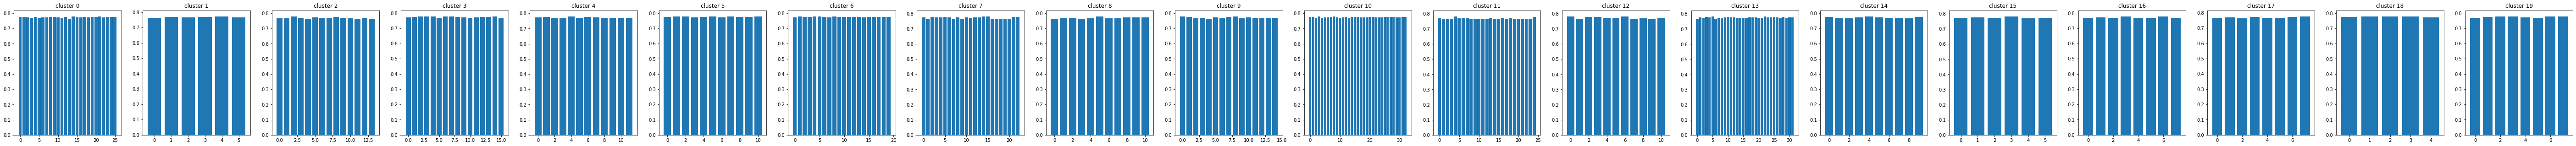

In [ ]:
#kmeans
f, axes = plt.subplots(1, len(prf.clusters), figsize=(len(prf.clusters) * 5,5))
for i in range(len(prf.clusters)):
    plot_accuracy(axes[i], prf, i)


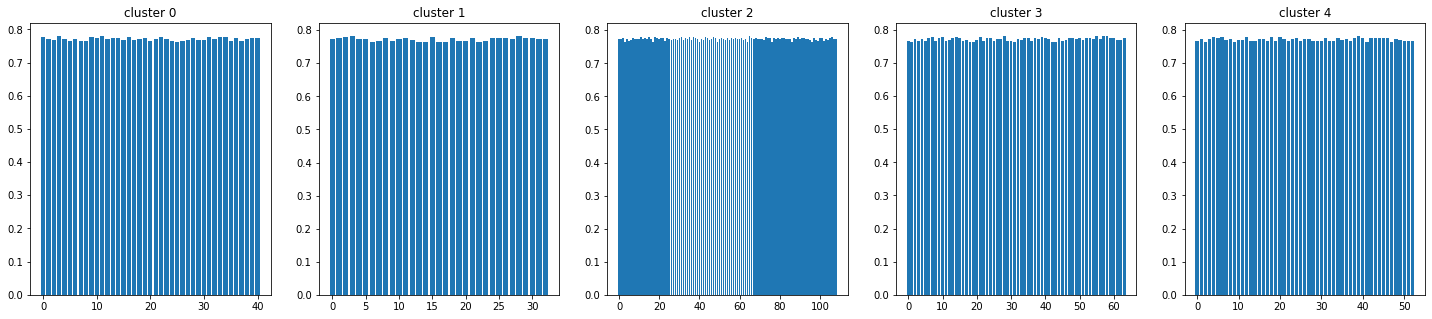

In [ ]:
#dbscan
f, axes = plt.subplots(1, len(prf1.clusters), figsize=(len(prf1.clusters) * 5,5))
for i in range(len(prf1.clusters)):
    plot_accuracy(axes[i], prf1, i)

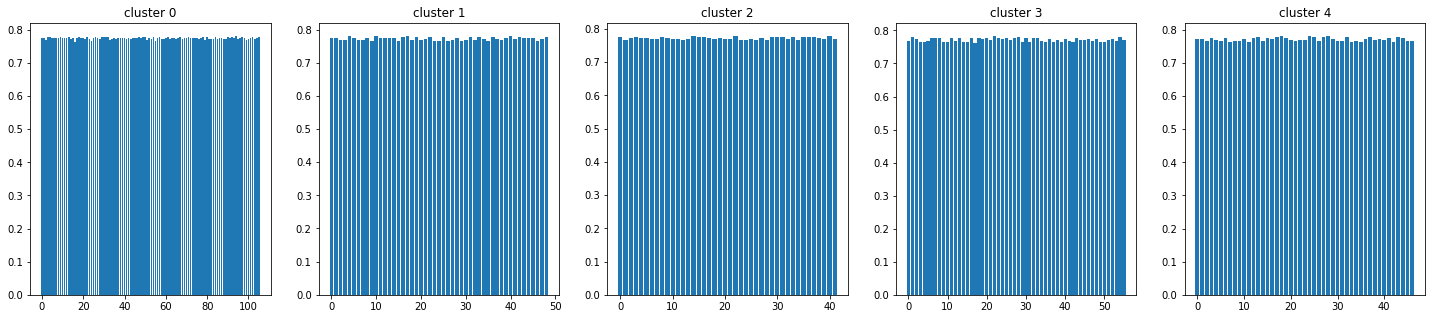

In [ ]:
#agglomerative
f, axes = plt.subplots(1, len(prf2.clusters), figsize=(len(prf2.clusters) * 5,5))
for i in range(len(prf2.clusters)):
    plot_accuracy(axes[i], prf2, i)
    

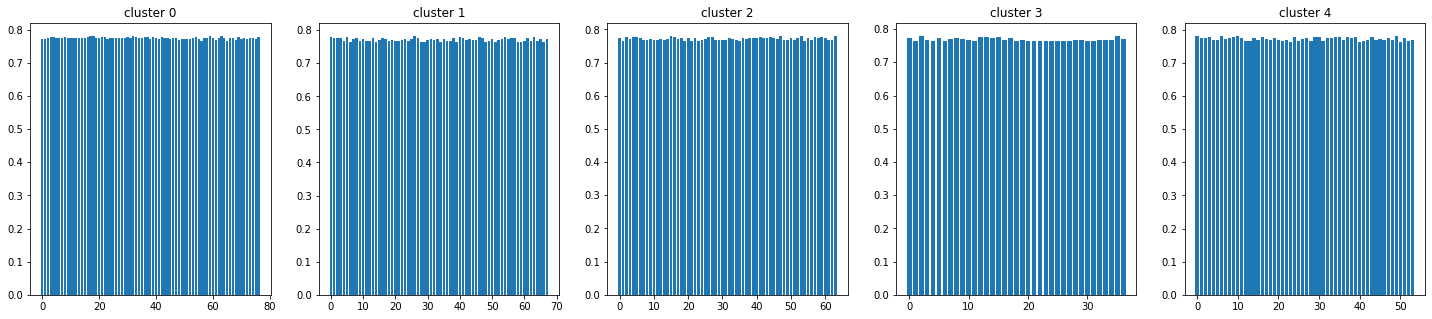

In [ ]:
#gaussian
f, axes = plt.subplots(1, len(prf3.clusters), figsize=(len(prf3.clusters) * 5,5))
for i in range(len(prf3.clusters)):
    plot_accuracy(axes[i], prf3, i)

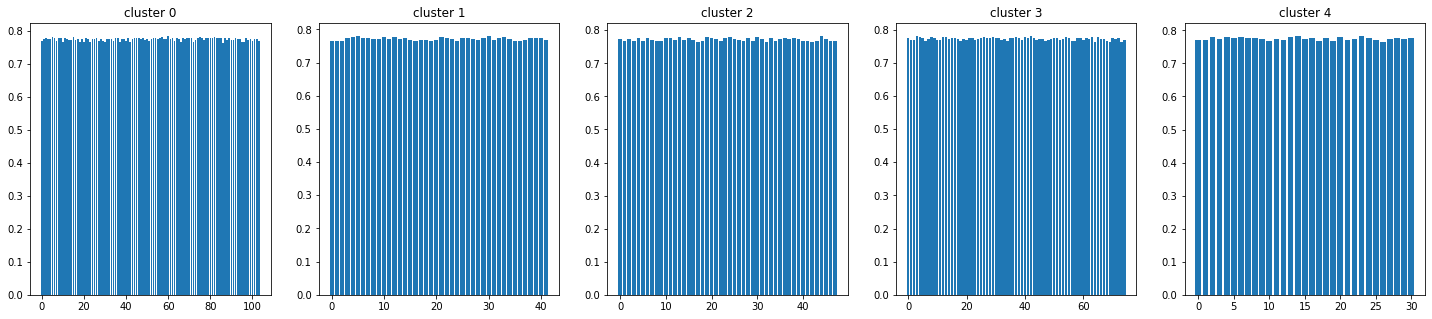

In [ ]:
#spectral clusterings
f, axes = plt.subplots(1, len(prf4.clusters), figsize=(len(prf4.clusters) * 5,5))
for i in range(len(prf4.clusters)):
    plot_accuracy(axes[i], prf4, i)

In [ ]:
test = np.array([[1, 2], [3, 4], [5, 6]])
test

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
test.shape

(3, 2)